<a href="https://www.kaggle.com/code/esmanuralican/titanik-eda?scriptVersionId=102275069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # görselleştirme için kullanılıyor
plt.style.use("seaborn-whitegrid") # seaborn-whitegrid ile görselleştir.

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore") # noktanın ardından tab'a basılarak kullanılabilcek seçenekler otomatik çıkacakdır(İnternet yavaş ise çalışmayabilir).  |  (ignore) : Python'dan kaynaklı uyarıları görmezden gel(tavsiye edilmez).


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. In 1912, during her voyage the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = 'blue' >
    Content:
   
1. [Load and Check Data](#1)     
1. [Variable Description](#2) 
    * [Univariate Variable Analysis](#3)   
        * [Categorical Variable ](#4)
        * [Numerical Variable ](#5)     
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Value](#9)
    * [Fill Value](#10)
1.[Visualization](#11)    
    * [Correlation Between SibSp -- Parch -- Age -- Fare -- Survived](12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing : Age Feauture](#20)

<a id = "1"></a><br>
# Load and Check Data 


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassangerId  = test_df["PassengerId"] #PassengerId ifadesinin ilk değerinin kaybolmaması için bir değişkene atandı.


In [3]:
train_df.columns #features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head() #ilk 5 verinin değerleri gösterildi.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe() # nümerik(sayısal) feature'lar ile ilgili istatistiksel bilgiler yazdırıldı.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId : Unique is number to each passenger
1. Survived : passenger survived (1) or die (0)
1. Pclass : passenger class
1. Name : name of passenger
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouses
1. Parch : number of parents/ children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked ( C = Cherbourg,         Q = Queenstown,        S = Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- float64(2) : Fare and Age
- int64(5) : Pclass , Sibsp ,  Parch , PassengerId and Survived
- object(5) : Name , Cabin , Sex , Embarked and Ticket

<a id = "3"></a><br>
# Univariate Variable Analysis
 * Categorical Variable : Survived(dead/live) , Sex(F/M) , Pclass , Embarked , Cabin , Name , Ticket , SibSp , Parch
 * Numerical Variable : Age , PassengerId , Fare(bilet fiyatı)

<a id = "4"></a><br>
## Categorical Variable

In [7]:
def bar_plot(variable):
    """
    input : variable ex: "Sex"
    output : bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(valu/sample)
    varValue = var.value_counts()#cinsiyetten kaç adet olduğunu göstermeye yarıyor
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index , varValue) # herhangi bir feature içindeki seçenek sayısının gösterir. Ör: A listesinde 4 M ve 4 F olsun.
    plt.xticks(varValue.index , varValue.index.values) #xtixks : x'de bulunan tik sayısı
    plt.ylabel("Frequency") # ylabel : y ekseninde bulunan kategorilere ait sample sayısı
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))
    
    

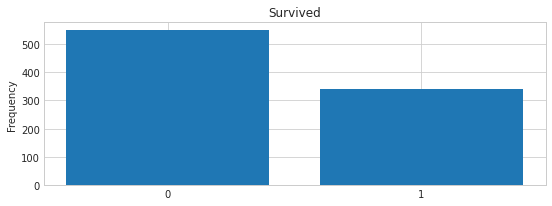

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


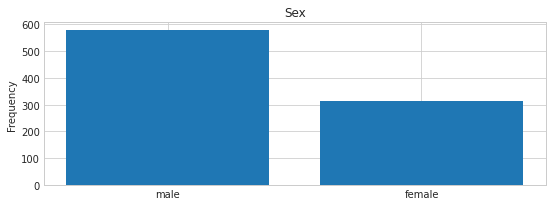

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


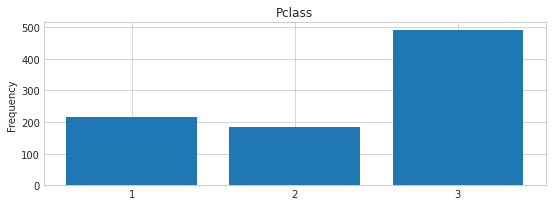

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


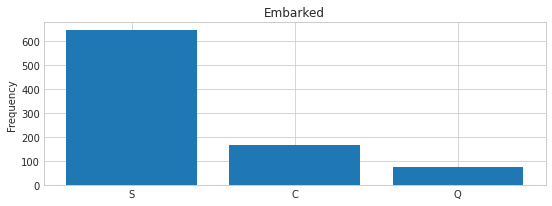

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


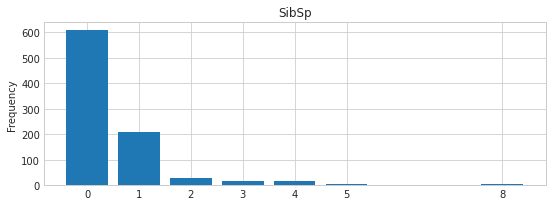

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


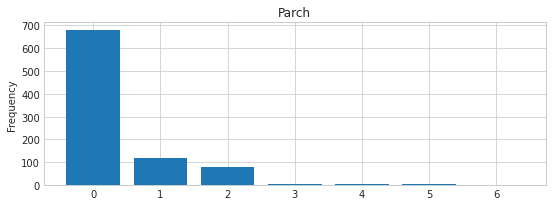

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2 = ["Cabin" , "Name" , "Ticket"] # Aslında categorical olduğunu bilinen ama görselleştirme yapıldığı zaman çok karmaşa yaratacağından emin olunan categorical variable'ları gösteriyor.
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



 <a id = "5"></a><br>
 ## Numerical Variable

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable]) #  plt.hist ile train.df'nin tüm variable'larını sırasıyla çağırıldı.
    plt.xlabel(variable)
    plt.ylabel("Frequency") # ilgili feature'a ait kaç adet  sample bulunmakta.
    plt.title("{} distrubution with hist".format(variable))
    plt.show()

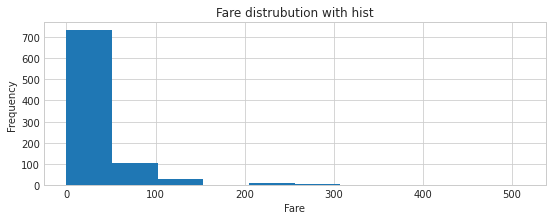

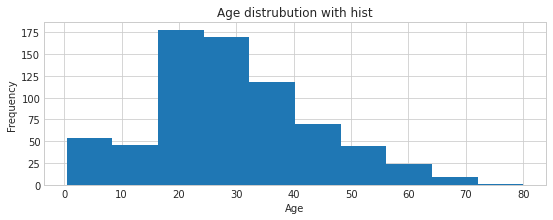

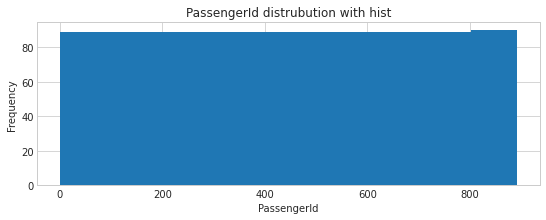

In [11]:
numericVar = ["Fare" , "Age" , "PassengerId"]
for n in numericVar:
    plot_hist(n)
    
    

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp -Survived
* Parch - Survived


Bu değerlerin birbirleri ile bağlantısının olduğunun kontrolü sağlandı.

In [12]:
#Pclass - Survived
train_df[["Pclass","Survived"]] # DataFrame içerisinde bulunan "Pclass" ve "Survived" feature'larını görüntülemek için

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [13]:
#Pclass - Survived
train_df[["Pclass" , "Survived"]].groupby(["Pclass"], as_index = False) # Pclass'ın Survived'a olan etkisini öğrenmek için (Pclass'a göre groupby yapıldı) 

In [14]:
# Yukarıda bulunan kodda ek olarak verilerin neye göre sıralayacağının da belirtilmesi gerekli. 
train_df[["Pclass" , "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False) # grupla ve ortalamasını göster


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<font color = 'blue' >
sort_values(by = "Survived", ascending = False) : 
</font> 

Değerleri Survived'a göre artan(ascending) olarak sırala.

In [15]:
#Sex - Survived
train_df[["Sex" , "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False) #Sex'in Survived'a olan etkisini öğrenmek için (Sex'e göre groupby yapıldı)  

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
# SibSp - Survived
train_df[["SibSp" , "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False) #SibSp'in Survived'a olan etkisini öğrenmek için (SibSp'e göre groupby yapıldı)  

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
# Parch - Survived
train_df[["Parch" , "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False) # Parch'ın Survived'a olan etkisini öğrenmek için (Parch'a göre groupby yapıldı)  

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Eğer çıkan sonuçlar arasında herhangi bir correlation(ilişki) yoksa bu değerler sınıflandırma modeli için farklı bilgiler sağlayabilir. Yani bu değerler ( ör : Parch ve SubSp) birleştirilirse sınıflandırmada kullanılan modeli eğitmek için yeni bir feature oluşturulabilir.

In [18]:
# Parch(parent / child) - SibSp(Sister / spouse)
train_df[["Parch" , "SibSp"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "SibSp", ascending = False) # Parch'ın SibSp'a olan etkisini öğrenmek için (Parch'a göre groupby yapıldı)  

,Parch,SibSp
2,2,2.062500
1,1,1.084746
3,3,1.000000
6,6,1.000000
4,4,0.750000
5,5,0.600000
0,0,0.237463


<a id = "7"></a><br>
# Outlier Detection
Kısaca istatiksel anlamda elimizde bulunan veriyi bozan sample'lardır. 
Ör: Bir firmada çalışanların maaş değerleri : 1,2,3,4,5,6,7,8,9,100 olsun. Müdür çalışanlarına zam yapacağı zaman çalışanların maaş ort 14.5 oluyor ve bunun yeterli olduğunu varsayıyor. Oysaki 100 değeri çıkartıldığında yeni ort değeri 4.5 olmaktadır. Bu nedenle 100 burada outlier'dır.


1st quartile = Q1 -> 3 (1,2,3,4,5 -> 3 )
                 
                 Second quartile (median) = Q3 -> 5.5

3rd quartile = Q3 -> 8 (6,7,8,9,100 -> 8)


**

IQR = Q3 -Q1 = 5

Outlier detection step -> 5 x 1.5 = 7.5 

Q1 - 7.5  ||  Q3 + 7.5

   -4.5     |     15.5
   
-4.5,1,2,3,4,5,6,7,8,9,15.5,100   -4.5 ve 15.5 aralığında kalan değerler OUTLIER'dır.

!!!Eğer outlier çıkartılmaz ise istatiksel anlamda doğru bilgiler elde edilemez yani Machine Learning modeli doğru eğitilmiş olmaz.(1,2adet olan tolere edilebilir büyük çalışmalar için)
   
 

In [19]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 =  np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers
            

In [20]:
# Hangi veriden kaç adet olduğunu hesaplar : Counter() 
a = ["a", "a" , "a", "a" , "a", "a" ,"[b]"]
Counter(a)

Counter({'a': 6, '[b]': 1})

In [21]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
train_df.loc[detect_outliers(train_df,["Age", "SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [23]:
#drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age", "SibSp","Parch","Fare"]), axis=0).reset_index(drop = True )

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

Missing value^ları atabilmek ya da onları doldurabilmek için hem test hem de train dataframe'i içersindeki değerlere bakılmalı. Çünkü missing value'lar yalnızca train'in içerisinde doldurularak eğitilirse oluşturulan ML modelinde test datafreme'inin içerisinde bulunan boş değerleri görünce hata verecektir. Bu nedenle test ve train dataframe'leri birleştirilecektir. Bu sayede "missing value" problemi ortadan kalkacaktır.

In [24]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df],axis= 0 ).reset_index(drop = True)
# Bu kısım 1'den fazla kez çalıştırılmamalı, çalıştırılır ise kodların tümü restart edilmeli.

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
# Find Missing Value

In [26]:
train_df.columns[train_df.isnull().any()] # missing value ifadelerinin hangi sütunda olduğu 

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [27]:
train_df.isnull().sum() # kaç adaet missing value var

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a><br>
# Fill Missing Value
"Veriyi kaybetmektense doldurmak daha mantıklı"
* Embarked has 2 missing value
* Fare has 1

In [28]:
train_df[train_df["Embarked"].isnull()] #60. ve 821. yolcuların gemiye nerden bindiği bilinmiyor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


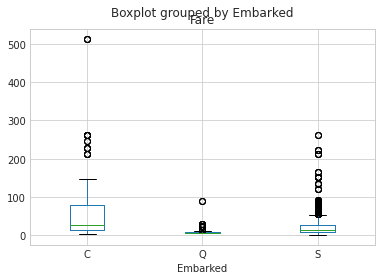

In [29]:
train_df.boxplot(column = "Fare" , by = "Embarked")
plt.show()

Yolcuların C durağından binme olasıkları çok yüksek.

In [30]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")  # Boş olan değerlere C yazıldı.
train_df[train_df["Embarked"].isnull()]#


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
train_df[train_df["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
train_df[train_df["Pclass"] == 3]["Fare"]

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [34]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"]) # 3. sınfa ait insanların ort ödediği değer 13.675550101832993 

12.741219971469329

In [35]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

<AxesSubplot:>

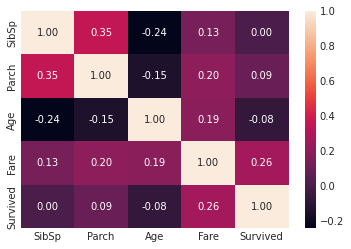

In [36]:
list1 = ["SibSp" , "Parch" , "Age" , "Fare" , "Survived" ]
sns.heatmap(train_df[list1].corr(), annot = True , fmt = ".2f") # annot = True : Korelasyon matrisi üzerindeki değerlerin yazılmasını sağlıyor. 
# fmt = ".2f" : virgülden sonraki 2 basamağın görülmesi
# annot = True : korelasyon değerleri kutucuklar üzerinde gösteriliyor  \ 
# annot = False : korelasyon değerleri kutucuklar üzerinde gösterilmiyor

Fair özelliği survived özelliği ile bir korelasyona sahip (doğru orantılı olarak). -> 0.26

<a id = "13"></a><br>
## SibSp -- Survived

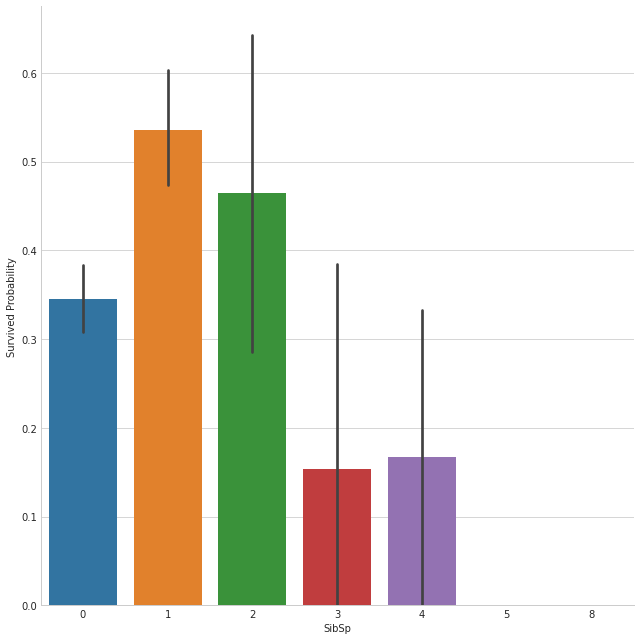

In [37]:
g = sns.factorplot(x = "SibSp" , y = "Survived" , data = train_df , kind = "bar" , size = 9)
g.set_ylabels("Survived Probability")
plt.show()

Yaşama oranı 2'den fazla aile üyesine sahip olanların haytta kalma oranı daha düşük.

Aileddeki birey sayısı (SibSp) 0 , 1 , 2 ise hayatta kalma şansı daha fazla.

We can consider a new feature describing these categories    

 

<a id = "14"></a><br>
## Parch -- Survived 

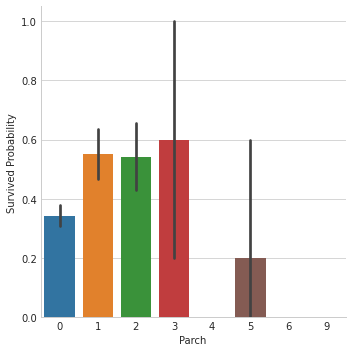

In [38]:
g = sns.factorplot(x = "Parch" , y = "Survived" , kind = "bar" , data = train_df , size = 5 )
g.set_ylabels("Survived Probability")
plt.show()

* SibSp and PArch can be used for new feature extraction with th = 3
* Small families have more chance to survive.
* There is a standart deviation(standart sapma) in survival of passenger with Parch = 3 

<a id = "15"></a><br>
## Pclass -- Survived 

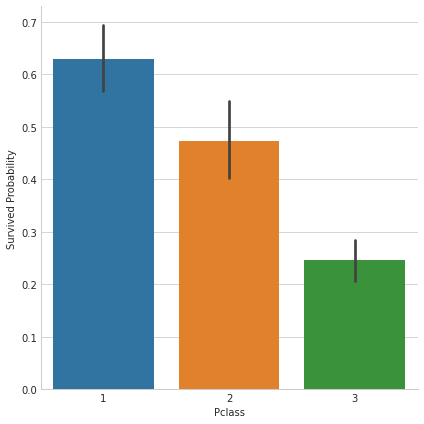

In [39]:
g = sns.factorplot ( x = "Pclass" , y = "Survived", data = train_df , kind = "bar", size = 6 )
g.set_ylabels("Survived Probability")                    
plt.show()                    

<a id = "16"></a><br>
## Age -- Survived 

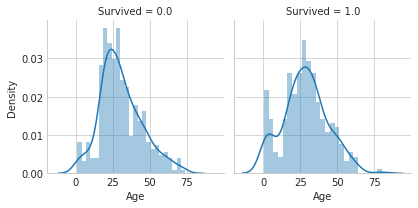

In [40]:
g = sns.FacetGrid(train_df , col = "Survived")
g.map(sns.distplot , "Age" , bins = 25)
plt.show()

Soldaki grafik = haytta kalmayanlar

Sağdaki grafik = hayatta kalanlar
* Age <= 10 Has a survival rate,
* Oldest passenger (>80) survived,
* Large number of 20 years old did not survived,
* Most passengers are in 15-35 age range,
* Use age feature in training
* Use age distribution for missing value of age. 

<a id = "17"></a><br>
## Pclass -- Survived -- Age

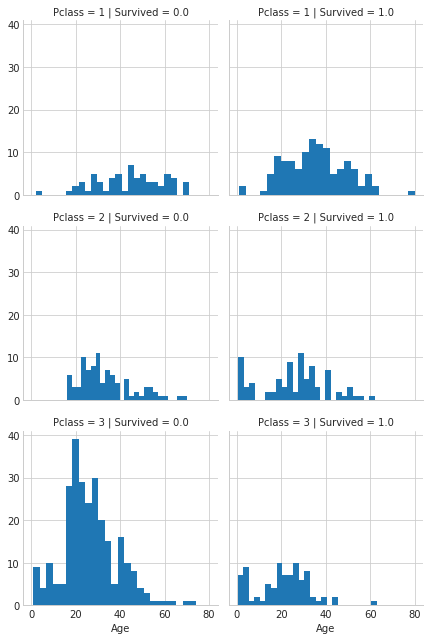

In [41]:
g = sns.FacetGrid( train_df , col = "Survived" , row = "Pclass" , size = 3)
g.map(plt.hist , "Age" , bins = 25)
g.add_legend()
plt.show()

-Pclass değeri 1'e yaklaştıkça haytta kalma oranı daha fazla


<a id = "18"></a><br>
## Embarked -- Sex -- Pclass -- Survived

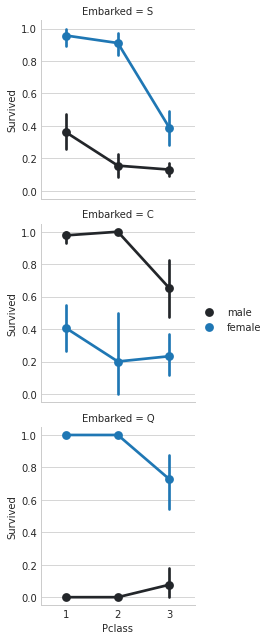

In [42]:
g = sns.FacetGrid(train_df , row = "Embarked" , size = 3 )
g.map(sns.pointplot, "Pclass" , "Survived" , "Sex")
g.add_legend()
plt.show()


Sex is related to survived , Females are survived more than Males.
* C : Erkeklerin hatta kalma oranı daha fazla
* S : Kadınların hatta kalma oranı daha fazla
* Q : Kadınların hatta kalma oranı daha fazla

<a id = "19"></a><br>
## Embarked -- Sex -- Fare -- Survived

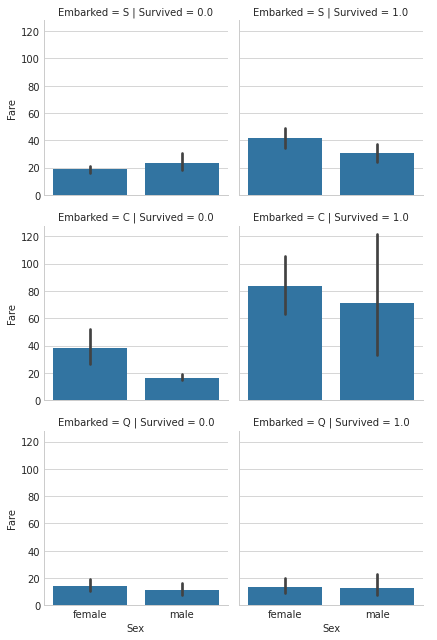

In [43]:
g = sns.FacetGrid(train_df , row= "Embarked" , col = "Survived" , size = 3)
g.map(sns.barplot, "Sex" , "Fare")
g.add_legend()
plt.show()

Daha çok para ödeyenlerin hayatta kalma olasılıkları daha fazla.
Hayatta kalan kadınlar hayatta kalan erkeklere göre daha fazla para ödemiş ( C limanında )

<a id = "20"></a><br>
# Fill Missing : Age Feauture

In [44]:
train_df[train_df["Age"].isnull()] # Age feature'ında bulunan null değerlerini bul ve bunu dataframe'e aktar.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


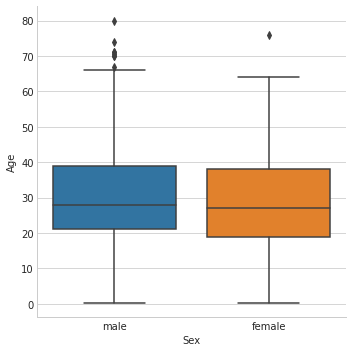

In [45]:
sns.factorplot(x = "Sex" , y ="Age" , data =  train_df , kind = "box")
plt.show()

Kutuların ortasında bulunan çizgi medyanı ifade etmekte.
* Sex is not informative for age prediction , age distrubution seems to same.


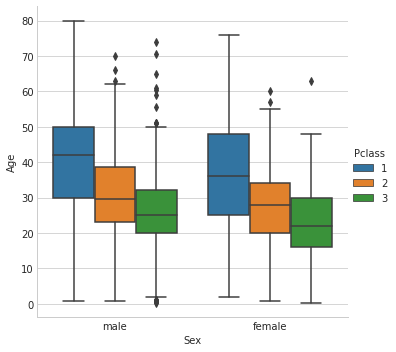

In [46]:
sns.factorplot(x = "Sex" , y ="Age" , hue = "Pclass" , data =  train_df , kind = "box")
plt.show()

1st class passengers are older than 2nd , and 2nd is older than 3rd class. 

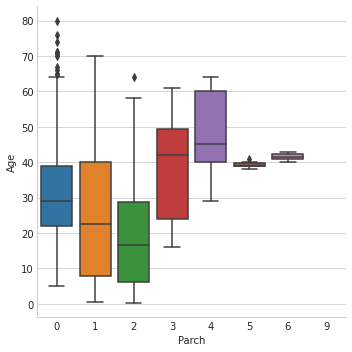

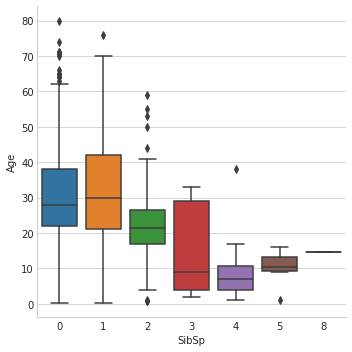

In [47]:
sns.factorplot(x = "Parch" , y ="Age" , data =  train_df , kind = "box")
sns.factorplot(x = "SibSp" , y ="Age" , data =  train_df , kind = "box")
plt.show()

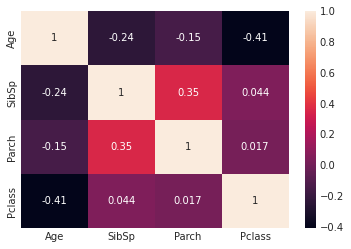

In [48]:
sns.heatmap(train_df[["Age" , "Sex" , "SibSp" , "Parch" , "Pclass"]].corr() , annot = True)
plt.show()

Sex özelliği string bir değer döndürdüğü için heatmap'de görülmez. Bu nedenle bu ifadelerin sayısal değerlere dönüştürülmesi gerekir.

In [49]:
train_df["Sex"]

0         male
1       female
2       female
3       female
4         male
         ...  
1294      male
1295    female
1296      male
1297      male
1298      male
Name: Sex, Length: 1299, dtype: object

In [50]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]] 

In [51]:
train_df["Sex"]

0       1
1       0
2       0
3       0
4       1
       ..
1294    1
1295    0
1296    1
1297    1
1298    1
Name: Sex, Length: 1299, dtype: int64

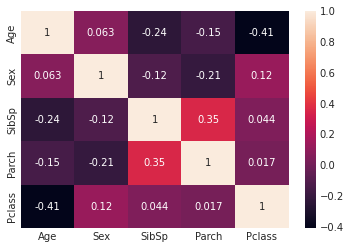

In [52]:
sns.heatmap(train_df[["Age" , "Sex" , "SibSp" , "Parch" , "Pclass"]].corr() , annot = True)
plt.show()

Age is not correlated with sex but it is correlated with Parch ,  SibSp and Pclass. 

In [53]:
# NaN value'ların indexlerini bulalım.
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
index_nan_age

[5,
 17,
 19,
 26,
 27,
 28,
 30,
 31,
 35,
 41,
 44,
 45,
 46,
 47,
 54,
 63,
 64,
 75,
 76,
 81,
 86,
 93,
 99,
 105,
 107,
 119,
 124,
 126,
 138,
 152,
 156,
 163,
 165,
 173,
 177,
 181,
 182,
 192,
 194,
 209,
 218,
 224,
 230,
 235,
 236,
 245,
 251,
 255,
 259,
 265,
 269,
 272,
 279,
 290,
 293,
 295,
 296,
 298,
 299,
 301,
 324,
 328,
 329,
 340,
 344,
 347,
 351,
 352,
 357,
 360,
 361,
 368,
 377,
 381,
 402,
 403,
 404,
 406,
 408,
 413,
 418,
 421,
 424,
 437,
 444,
 447,
 450,
 452,
 457,
 459,
 461,
 463,
 468,
 474,
 478,
 483,
 488,
 490,
 495,
 500,
 504,
 510,
 515,
 517,
 520,
 524,
 526,
 531,
 540,
 545,
 550,
 553,
 556,
 557,
 561,
 566,
 571,
 577,
 582,
 586,
 589,
 591,
 594,
 595,
 604,
 605,
 606,
 622,
 626,
 632,
 636,
 641,
 643,
 646,
 649,
 660,
 662,
 667,
 673,
 685,
 690,
 702,
 704,
 711,
 720,
 725,
 731,
 732,
 733,
 753,
 759,
 761,
 766,
 769,
 771,
 776,
 783,
 785,
 807,
 817,
 818,
 820,
 824,
 829,
 831,
 840,
 850,
 858,
 868,
 878,
 891

In [54]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age : 
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred) :
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med 
    

In [55]:
age_pred

16.0

In [56]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
